In [2]:
#Import required libraries
import numpy as np  #To work with arrays
import pandas as pd #To work with dataframes
import matplotlib.pyplot as plt #plotting library
import seaborn as sns #plotting library
import tensorflow as tf #symbolic math library that allows complex machine learning algorithms and controls the dataflow across a range of tasks
import keras #Neural network library and works as a wrapper to low level library like tensorflow
from keras.models import Sequential #is used to create linear stacked layers
from keras.layers import Dense #Dense implements the operation for the activation in consideration
from sklearn.model_selection import train_test_split #split the dataset in to train and test
from sklearn.preprocessing import  MinMaxScaler #for normalization of data
from sklearn import metrics #to evaluate the model
from sklearn.metrics import r2_score #metrics to evaluate the accuracy of the regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error #metrics to evaluate the error rate in the model
from sklearn.metrics import explained_variance_score #variance explained by the predictors for predicting target variable (a value of 1 indicates perfect prediction)
import warnings #to control the warnings displayed during run time
warnings.filterwarnings('ignore') #supresses the warning messages if any
sns.set(style='white', context='notebook', palette='deep', font_scale=1) 
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
#The base context is “notebook”, and the other contexts are “paper”, “talk”, and “poster”, which are version of the notebook parameters scaled by .8, 1.3, and 1.6, respectively.
#deep, muted, bright, pastel, dark, colorblind are the available sns palettes based on which the plots will be displayed
#darkgrid, whitegrid, dark, white, ticks are the axes styles within sns

Using TensorFlow backend.


In [3]:
from google.colab import files #to import files in google colab
uploaded = files.upload() #upload files in google colab


Saving CrimeMerged.csv to CrimeMerged.csv


In [0]:
narcotics = pd.read_csv('CrimeMerged.csv') #read the uploaded file
best = narcotics[['geohash', 'Primary_Type', 'Year', 'Month', 'WEEKDAY', 'Holiday',
                     'Time', 'crimescount','Avg_Student_Attendance_Rate', 'Avg_Teacher_Attendance_Rate', 'Mobility_Rate_Pct', 'NearestPoliceDist', 'NearestRedCamDist',
                      'RedCamCount', 'SchoolCount', 'avgTemp', 'prcp','wind']]

In [5]:
best.dtypes #verify the datatypes of the loaded file

geohash                         object
Primary_Type                    object
Year                             int64
Month                            int64
WEEKDAY                          int64
Holiday                           bool
Time                            object
crimescount                      int64
Avg_Student_Attendance_Rate    float64
Avg_Teacher_Attendance_Rate    float64
Mobility_Rate_Pct              float64
NearestPoliceDist              float64
NearestRedCamDist              float64
RedCamCount                    float64
SchoolCount                    float64
avgTemp                        float64
prcp                           float64
wind                           float64
dtype: object

In [0]:
#convert the categorical features to object data type
best.Month = best.Month.astype(object)
best.geohash = best.geohash.astype(object)
best.Year = best.Year.astype(object)
best.WEEKDAY = best.WEEKDAY.astype(object) 
best.Holiday = best.Holiday.astype(object)
best.Time = best.Time.astype(object)


In [7]:
best.describe() #verify the summary of the variables

,crimescount,Avg_Student_Attendance_Rate,Avg_Teacher_Attendance_Rate,Mobility_Rate_Pct,NearestPoliceDist,NearestRedCamDist,RedCamCount,SchoolCount,avgTemp,prcp,wind
count,33565.000000,33565.000000,33565.000000,33565.000000,33565.000000,33565.000000,33565.000000,33565.000000,33565.000000,33565.000000,33565.000000
mean,4.908714,92.489259,93.312145,17.534964,2.120672,1.205931,4.141129,19.179681,66.136467,33.094085,36.153498
std,6.871703,2.057153,2.018755,6.780318,0.997082,0.957710,3.666013,10.830161,5.943481,2.284405,0.698437
min,1.000000,70.430000,89.300000,2.400000,0.780000,0.510000,0.000000,1.000000,55.295484,32.000000,34.589677
25%,1.000000,91.360000,92.220000,12.650000,1.480000,0.590000,1.000000,10.000000,61.984516,32.000000,35.692903
50%,3.000000,92.650000,94.180000,16.680000,1.800000,0.930000,4.000000,19.000000,64.772000,32.220645,36.338000
75%,6.000000,93.900000,95.050000,22.010000,2.300000,1.610000,6.000000,26.000000,71.852000,33.283226,36.796129
max,130.000000,96.600000,95.950000,37.330000,6.330000,8.040000,12.000000,48.000000,77.396000,45.755484,37.058000


In [8]:
best.columns #to display the columns of the dataframe

Index(['geohash', 'Primary_Type', 'Year', 'Month', 'WEEKDAY', 'Holiday',
       'Time', 'crimescount', 'Avg_Student_Attendance_Rate',
       'Avg_Teacher_Attendance_Rate', 'Mobility_Rate_Pct', 'NearestPoliceDist',
       'NearestRedCamDist', 'RedCamCount', 'SchoolCount', 'avgTemp', 'prcp',
       'wind'],
      dtype='object')

In [9]:
best_df_with_dummies = pd.get_dummies(best)
best_df_with_dummies.head(1)  #86 features with geohash,crime type, year, month and weekday, holiday

,crimescount,Avg_Student_Attendance_Rate,Avg_Teacher_Attendance_Rate,Mobility_Rate_Pct,NearestPoliceDist,NearestRedCamDist,RedCamCount,SchoolCount,avgTemp,prcp,wind,geohash_dp3sy,geohash_dp3sz,geohash_dp3t5,geohash_dp3t7,geohash_dp3td,geohash_dp3te,geohash_dp3tf,geohash_dp3tg,geohash_dp3th,geohash_dp3tj,geohash_dp3tk,geohash_dp3tm,geohash_dp3tn,geohash_dp3tp,geohash_dp3tq,geohash_dp3tr,geohash_dp3ts,geohash_dp3tt,geohash_dp3tu,geohash_dp3tv,geohash_dp3tw,geohash_dp3tx,geohash_dp3ty,geohash_dp3v0,geohash_dp3v2,geohash_dp3w4,geohash_dp3w5,geohash_dp3w6,geohash_dp3w7,...,geohash_dp3wh,geohash_dp3wj,geohash_dp3wk,geohash_dp3wm,geohash_dp3wn,geohash_dp3wq,geohash_dp3ws,geohash_dp3wt,geohash_dp3wu,geohash_dp3wv,geohash_dp3x1,geohash_dp3xh,Primary_Type_ASSAULT,Primary_Type_HOMICIDE,Primary_Type_NARCOTICS,Primary_Type_VIOLATIONS,Year_2015,Year_2016,Year_2017,Year_2018,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,WEEKDAY_0,WEEKDAY_1,Holiday_False,Holiday_True,Time_afternoon,Time_evening,Time_morning,Time_night
0,3,92.83,94.57,26.88,4.16,3.93,0.0,5.0,59.418065,33.283226,34.589677,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0


In [0]:
#Separate the predictors and target variables
x = best_df_with_dummies.drop(['crimescount'],axis=1).values
y = best_df_with_dummies.crimescount.values 
#Set the seed to generate the same random state
np.random.seed(18)

In [0]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 10,test_size=0.20)
#test size: 80:20 split in this case
#random state: to generate the same split everytime

In [0]:
#Normalize only independent numerical variables
X_train[:,1] = X_train[:,1] / X_train[:,1].max()
X_train[:,2] = X_train[:,2] / X_train[:,2].max()
X_train[:,3] = X_train[:,3] / X_train[:,3].max()
X_train[:,4] = X_train[:,4] / X_train[:,4].max()
X_train[:,5] = X_train[:,5] / X_train[:,5].max()
X_train[:,6] = X_train[:,6] / X_train[:,6].max()
X_train[:,7] = X_train[:,7] / X_train[:,7].max()
X_train[:,8] = X_train[:,8] / X_train[:,8].max()
X_train[:,9] = X_train[:,9] / X_train[:,9].max()
X_train[:,10] = X_train[:,10] / X_train[:,10].max()

X_test[:,1] = X_test[:,1] / X_test[:,1].max()
X_test[:,2] = X_test[:,2] / X_test[:,2].max()
X_test[:,3] = X_test[:,3] / X_test[:,3].max()
X_test[:,4] = X_test[:,4] / X_test[:,4].max()
X_test[:,5] = X_test[:,5] / X_test[:,5].max()
X_test[:,6] = X_test[:,6] / X_test[:,6].max()
X_test[:,7] = X_test[:,7] / X_test[:,7].max()
X_test[:,8] = X_test[:,8] / X_test[:,8].max()
X_test[:,9] = X_test[:,9] / X_test[:,9].max()
X_test[:,10] = X_test[:,10] / X_test[:,10].max()


In [0]:

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])
model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 128)               11008     
_________________________________________________________________
dense_146 (Dense)            (None, 1)                 129       
Total params: 11,137
Trainable params: 11,137
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, verbose=2, validation_split=.2)

Train on 21481 samples, validate on 5371 samples
Epoch 1/50
 - 3s - loss: 41.3203 - mean_squared_error: 41.3203 - val_loss: 38.9079 - val_mean_squared_error: 38.9079
Epoch 2/50
 - 1s - loss: 29.8902 - mean_squared_error: 29.8902 - val_loss: 32.1322 - val_mean_squared_error: 32.1322
Epoch 3/50
 - 1s - loss: 27.4253 - mean_squared_error: 27.4253 - val_loss: 33.5000 - val_mean_squared_error: 33.5000
Epoch 4/50
 - 1s - loss: 26.9352 - mean_squared_error: 26.9352 - val_loss: 31.8300 - val_mean_squared_error: 31.8300
Epoch 5/50
 - 1s - loss: 26.8306 - mean_squared_error: 26.8306 - val_loss: 30.9907 - val_mean_squared_error: 30.9907
Epoch 6/50
 - 2s - loss: 26.8489 - mean_squared_error: 26.8489 - val_loss: 32.5584 - val_mean_squared_error: 32.5584
Epoch 7/50
 - 1s - loss: 26.7339 - mean_squared_error: 26.7339 - val_loss: 32.0924 - val_mean_squared_error: 32.0924
Epoch 8/50
 - 1s - loss: 26.7276 - mean_squared_error: 26.7276 - val_loss: 30.7229 - val_mean_squared_error: 30.7229
Epoch 9/50
 - 1

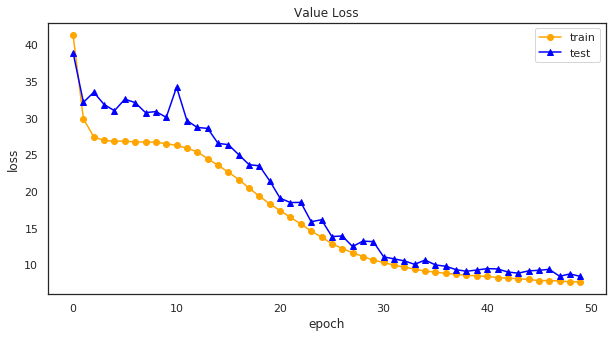

In [0]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'],marker='o',color='orange')
plt.plot(history.history['val_loss'],marker='^',color='blue')
plt.title('Value Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

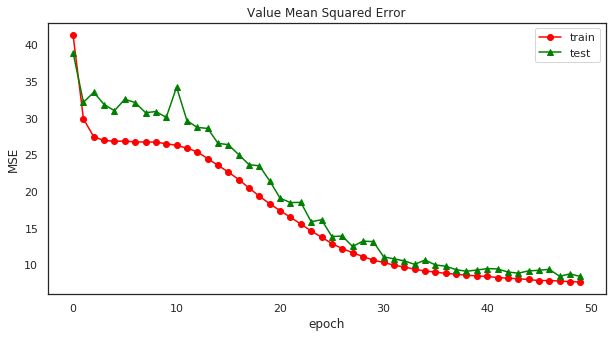

In [0]:
#plot the train vs test mse
plt.figure(figsize=(10,5))
plt.plot(history.history['mean_squared_error'],marker='o',color='red')
plt.plot(history.history['val_mean_squared_error'],marker='^',color = 'green')
plt.title('Value Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
pred_crimes = model.predict(X_test)
mse_pred_score = metrics.mean_squared_error(pred_crimes, y_test)
print('mse_pred_score {}'.format(mse_pred_score))
rmse_pred_score = np.sqrt(mse_pred_score)
print('rmse_pred_score {}'.format(rmse_pred_score))
r2_pred_score = r2_score(y_test, pred_crimes, multioutput='uniform_average')  
print('r2_pred_score - Coefficient of Determination {}'.format(r2_pred_score))
print("MAE ", mean_absolute_error(y_test, pred_crimes))

mse_pred_score 8.373669773096974
rmse_pred_score 2.8937293883666757
r2_pred_score - Coefficient of Determination 0.8311983932436713
MAE  1.6975255908884865


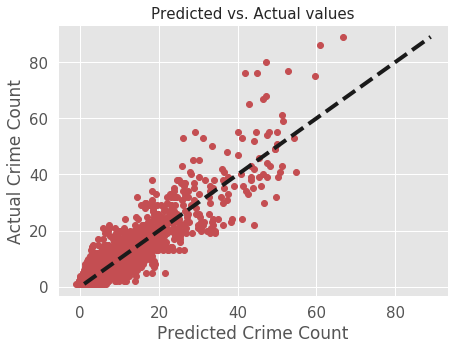

In [0]:
%matplotlib inline
import matplotlib

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
fig, ax = plt.subplots(figsize=(7, 5))
plt.style.use('ggplot')
plt.plot(pred_crimes, y_test, 'ro')
plt.xlabel('Predicted Crime Count', fontsize = 17)
plt.ylabel('Actual Crime Count', fontsize = 17)
plt.title('Predicted vs. Actual values', fontsize = 15)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

Add More layers and test

In [0]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])
model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_163 (Dense)            (None, 128)               11008     
_________________________________________________________________
dense_164 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_165 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_166 (Dense)            (None, 1)                 33        
Total params: 21,377
Trainable params: 21,377
Non-trainable params: 0
_________________________________________________________________


In [0]:
np.random.seed(80)
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=.2, verbose=2)

Train on 21481 samples, validate on 5371 samples
Epoch 1/50
 - 3s - loss: 41.0753 - mean_squared_error: 41.0753 - val_loss: 39.7513 - val_mean_squared_error: 39.7513
Epoch 2/50
 - 1s - loss: 27.5073 - mean_squared_error: 27.5073 - val_loss: 26.0302 - val_mean_squared_error: 26.0302
Epoch 3/50
 - 1s - loss: 21.3969 - mean_squared_error: 21.3969 - val_loss: 26.4148 - val_mean_squared_error: 26.4148
Epoch 4/50
 - 1s - loss: 19.2966 - mean_squared_error: 19.2966 - val_loss: 18.4155 - val_mean_squared_error: 18.4155
Epoch 5/50
 - 1s - loss: 17.8500 - mean_squared_error: 17.8500 - val_loss: 17.1179 - val_mean_squared_error: 17.1179
Epoch 6/50
 - 1s - loss: 16.5932 - mean_squared_error: 16.5932 - val_loss: 28.0122 - val_mean_squared_error: 28.0122
Epoch 7/50
 - 1s - loss: 15.3527 - mean_squared_error: 15.3527 - val_loss: 18.7587 - val_mean_squared_error: 18.7587
Epoch 8/50
 - 1s - loss: 13.9320 - mean_squared_error: 13.9320 - val_loss: 12.4076 - val_mean_squared_error: 12.4076
Epoch 9/50
 - 1

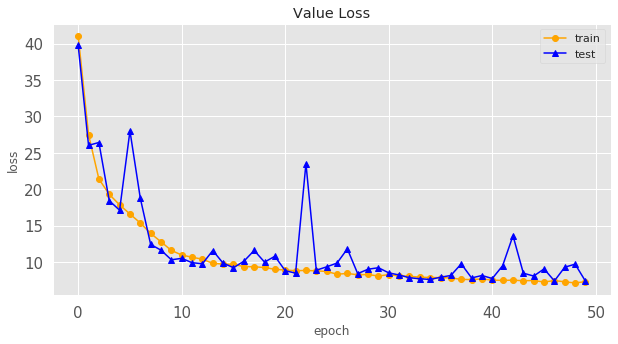

In [0]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'],marker='o',color='orange')
plt.plot(history.history['val_loss'],marker='^',color='blue')
plt.title('Value Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

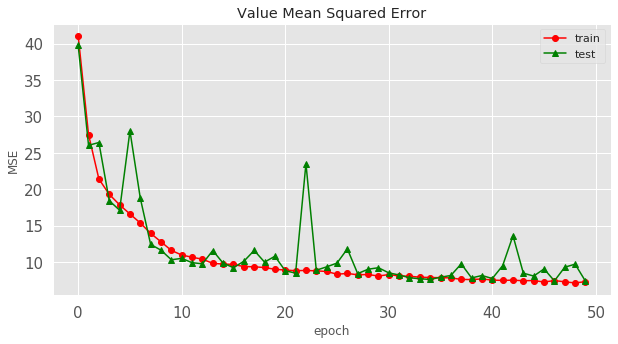

In [0]:
#plot the train vs test mse
plt.figure(figsize=(10,5))
plt.plot(history.history['mean_squared_error'],marker='o',color='red')
plt.plot(history.history['val_mean_squared_error'],marker='^',color = 'green')
plt.title('Value Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
pred_crimes = model.predict(X_test)
mse_pred_score = metrics.mean_squared_error(pred_crimes, y_test)
print('mse_pred_score {}'.format(mse_pred_score))
rmse_pred_score = np.sqrt(mse_pred_score)
print('rmse_pred_score {}'.format(rmse_pred_score))
r2_pred_score = r2_score(y_test, pred_crimes, multioutput='uniform_average')  
print('r2_pred_score - Coefficient of Determination {}'.format(r2_pred_score))
print("MAE ", mean_absolute_error(y_test, pred_crimes))

#mse_pred_score 7.601609533841023
#rmse_pred_score 2.7571016546077916
#r2_pred_score - Coefficient of Determination 0.8467620603610193
#MAE  1.6603343160660669


mse_pred_score 7.601609533841023
rmse_pred_score 2.7571016546077916
r2_pred_score - Coefficient of Determination 0.8467620603610193
MAE  1.6603343160660669


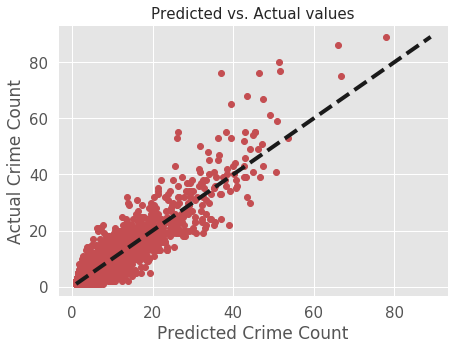

In [0]:
%matplotlib inline
import matplotlib

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
fig, ax = plt.subplots(figsize=(7, 5))
plt.style.use('ggplot')
plt.plot(pred_crimes, y_test, 'ro')
plt.xlabel('Predicted Crime Count', fontsize = 17)
plt.ylabel('Actual Crime Count', fontsize = 17)
plt.title('Predicted vs. Actual values', fontsize = 15)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()